# K-Means Clustering
This notebook contains an implementation of K-means clustering from Scratch using the SciKit dataset Iris. <br> <br>
**Iris Dataset** <br> <br>
The Iris dataset is a multivariate dataset related to flowers. The dataset contains three species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.



## Data Exploration
Before we start implementing the K-means clustering algorithm, we will start by loading the necessary libraries, dataset and explore the dataset


Loading Libraries and dataset

In [22]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

iris = load_iris()

During the data exploration, we will be using NumPys and Pandas to help extract information regarding the features and other important information.

In [23]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

From that we can see that the dataset contains 4 features:
- Sepal Length
- Sepal width
- Petal length
- Petal width


Along with the target variable species. 

**Data visualization**

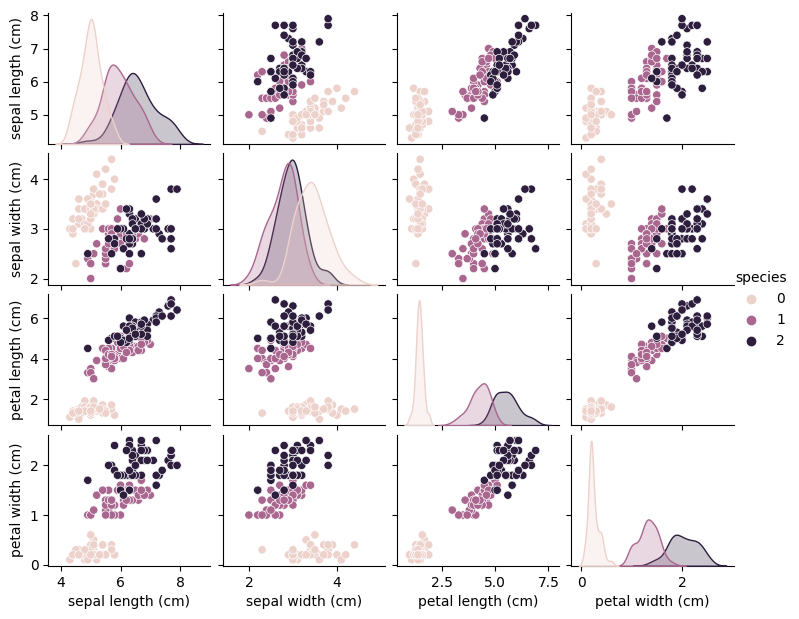

In [24]:
pairplot = sns.pairplot(df, hue='species', diag_kind='kde')
pairplot.fig.set_size_inches(8, 6)
plt.show()

From the visualization we can see a few different things:
- Petal Length and Petal Width show a strong correlation 
- In most of the plots, we see that the species 0; Setosa, seems to stand out 
- Class 1 and 2 have some more overlaps indicating perhaps some dimensionality reduction could be beneficial for creating better separation


To gain further insights, we will do a correlation analysis

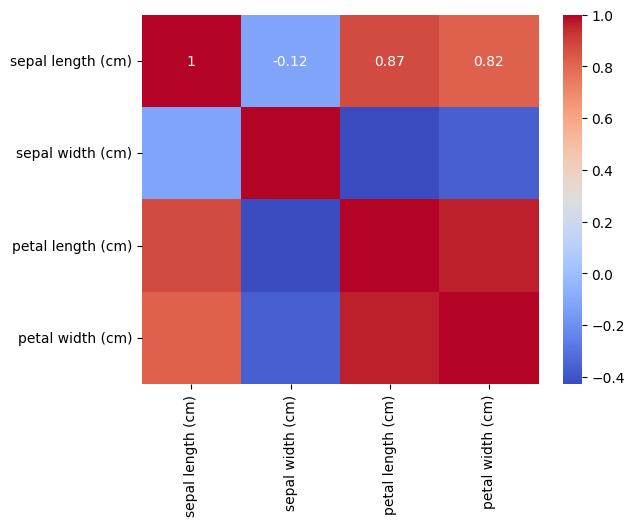

In [25]:
corr_matrix = df.iloc[:,:-1].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

Our heatmap also reflects the insights we got from the plots earlier. Petal length and width seems to show great correlation and might be one of the features that should be used for the K-means implementation.

We will then apply PCA to see if we can achieve even better separation and capture the strongest feature variations.

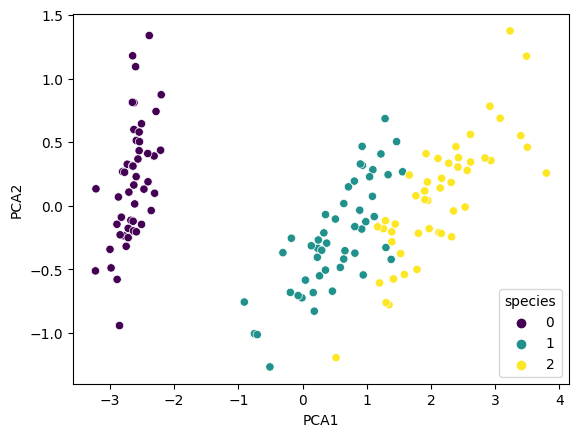

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.iloc[:, :-1])
df['PCA1'], df['PCA2'] = df_pca[:,0], df_pca[:, 1]

sns.scatterplot(x='PCA1', y='PCA2', hue=df['species'], palette='viridis', data=df)
plt.show()

The PCA shows that the species are naturally separable indicating that moving forward with K-means clustering will be a good approach. 

## K-means Clustering algorithm
The algorithm can be explained in 3 steps:
1. Calculate the distance from each point to each centroid
2. Assign each point to the nearest centroid
3. Then update the centroids to the average value of the points it belonged to.

In [27]:
scaler = StandardScaler()

X =iris.data[:, 2:4]

X = scaler.fit_transform(X)

class KMeans:
    def __init__(self, k=3, max_iters = 100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
    
    def fit(self, X):
        np.random.seed(42)
        # Randomly assign centroids
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]

        for i in range(self.max_iters):
            # Assign points to cluster
            self.labels = self.assign_cluster(X)
            # Compute new centroids
            new_centroid = np.array([X[self.labels == j].mean(axis=0) for j in range(self.k)])
            # Check convergence
            if np.linalg.norm(self.centroids - new_centroid) < self.tol:
                break

            self.centroids = new_centroid

    def assign_cluster(self, X):
        # Euclidean distance
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def predict(self, X):
        return self.assign_cluster(X)

Applying our K-means algorithm to the dataset

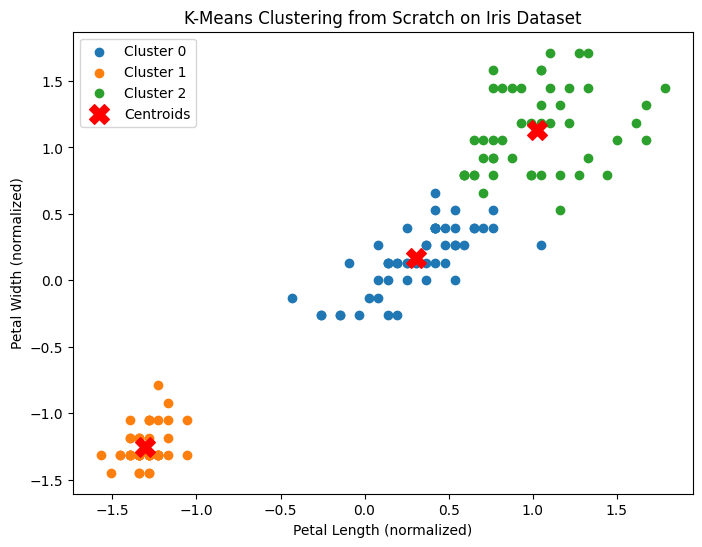

In [28]:
# Apply K-Means clustering
kmeans = KMeans(k=3)
kmeans.fit(X)
labels = kmeans.predict(X)

# Plot results
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i}')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Petal Length (normalized)')
plt.ylabel('Petal Width (normalized)')
plt.title('K-Means Clustering from Scratch on Iris Dataset')
plt.legend()
plt.show()

From the visualization, we can see the K-means clustering algorithm works as intended. Further testing could be done if desired. (Maybe something I will return to later)